# Fixed term tractable vs non-tractable

The purpose of this program is to measure the numerical difference between the tractable and non-tractable formulations of fixed term contracts.
This is because we are doing the same thing with varable term contracts.
By seeing how much the two formulations (which have been mathematically proven to be equivalent) differ, we can gain insight if the two formulations of variable term contracts are equivalent

In [8]:
import numpy as np
import cvxpy as cp
import pandas as pd
from math import floor, log10, isclose
import matplotlib.pyplot as plt
from contracts import get_contract, l_transpose, get_contract_non_tract, get_contract_saidur, get_contract_customtypes
from sensitivity import sensitivity_experiment, expand_results, plot_sensitivity
from tabulate import tabulate
from tqdm.notebook import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [12]:
types = list(range(1,21))
gammas = [0.05, 0.1, 0.5, 1]
trials = 5
l_err_abs_g = []
l_err_abs_w = []
l_err_rel_g = []
l_err_rel_w = []

for num_types in tqdm(types):
    for gamma in gammas:
        for trial in range(trials):
            G_t, W_t = get_contract(num_types)
            G_n, W_n = get_contract_non_tract(num_types)
            err_rel_g = np.linalg.norm(G_t - G_n)/np.linalg.norm(G_t)
            err_rel_w = np.linalg.norm(W_t - W_n)/np.linalg.norm(W_t)
            l_err_rel_g.append(err_rel_g)
            l_err_rel_w.append(err_rel_w)
            l_err_abs_g.append(np.linalg.norm(G_t - G_n))
            l_err_abs_w.append(np.linalg.norm(W_t - W_n))

  0%|          | 0/20 [00:00<?, ?it/s]

Mean Absolute Error in G:  1.1859243933774052e-05
Mean Absolute Error in W:  0.010623784795236943
Mean Relative Error in G:  0.00013405313109107975
Mean Relative Error in W:  0.00014914660042091463


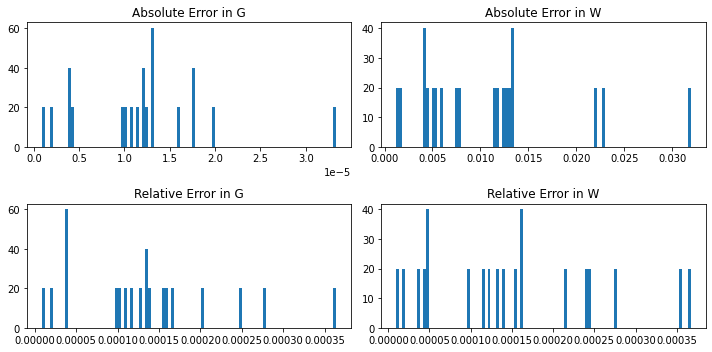

In [13]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2) 
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4)

ax1.hist(l_err_abs_g, bins=100)
ax1.set_title("Absolute Error in G")
ax2.hist(l_err_abs_w, bins=100)
ax2.set_title("Absolute Error in W")
ax3.hist(l_err_rel_g, bins=100)
ax3.set_title("Relative Error in G")
ax4.hist(l_err_rel_w, bins=100)
ax4.set_title("Relative Error in W")
fig1.tight_layout()
print("Mean Absolute Error in G: ", np.mean(l_err_abs_g))
print("Mean Absolute Error in W: ", np.mean(l_err_abs_w))
print("Mean Relative Error in G: ", np.mean(l_err_rel_g))
print("Mean Relative Error in W: ", np.mean(l_err_rel_w))


One important thing that I notice here is that the errors in fixed-term variable contracts seem more "uniformly distributed", whereas the ones in variable term contracts are more "exponentially distributed". However, this could be due to the fact that that the only parameter that we modified is the number of types, not the value of the types, and gamma.